# **TODO:**

- Alter the `NNmodel` classes to accept differnt model structures other than hidden layers
    - add functionality for Sigmoid, remove Enable/Disable dropout, etc. 
    - adjust output to handle cases other than binary classification

- Add more theoretical math models to explain the relationship

- Update training methods to reward/punish complexity 
    - currently there are different methods for each, patch them into one

# C.A.S.T.L.E.

#### Component Assembly Structure Tracking for Learning Emergence

Castle is an assembly tracking neural network, which partitions weight tensors into `molecular blocks` and assigns `atomic codes` based on block statistics. The resulting `molecular lattice` encodes the network's structural motifs, enabling calculation of an assembly index that quantifies **modularity and reuse**. During training, the `loss function` incorporates a `complexity reward` or penalty derived from the assembly index, and gradients are modulated according to molecular reuse. If the assembly index exceeds a threshold, the architecture is evolved to favor more efficient or interpretable structures. This approach bridges neural network optimization with principles from assembly theory, promoting modularity, interpretability, and adaptive architectural evolution.

***

## Mathematical Model of Assembly Tracking Neural Network with Atomic Codes

## 1. Weight Tensor Partitioning

Let $W \in \mathbb{R}^{m \times n}$ be the weight matrix of a neural network layer, where:
- $m$: number of input features,
- $n$: number of output features.

Partition $W$ into non-overlapping blocks (molecules) of size $k \times k$:

$$W = \bigcup_{i=1}^{M} \bigcup_{j=1}^{N} W_{i,j}$$

where:
- $W_{i,j}$: block (molecule) at position $(i, j)$,
- $M = \lfloor m/k \rfloor$: number of blocks along rows,
- $N = \lfloor n/k \rfloor$: number of blocks along columns,
- $k$: molecule (block) size.

## 2. Atomic Code Assignment

For each molecule $W_{i,j}$, compute its average value:

$$\mu_{i,j} = \frac{1}{k^2} \sum_{a=1}^{k} \sum_{b=1}^{k} W_{i,j}[a, b]$$

where:
- $\mu_{i,j}$: average value of molecule $W_{i,j}$,
- $a, b$: indices within the block.

Assign an atomic code $S_{i,j}$ using a discretization function $f$:

$$S_{i,j} = f(\mu_{i,j})$$

where:
- $S_{i,j}$: atomic code assigned to molecule $W_{i,j}$,
- $f$: function mapping average value to a symbol (e.g., 'Ze', 'Sm', 'Md').

## 3. Lattice Construction

The set of atomic codes forms a molecular lattice $L$:

$$L = \{ S_{i,j} \mid 1 \leq i \leq M, 1 \leq j \leq N \}$$

where:
- $L$: molecular lattice,
- $S_{i,j}$: atomic code at position $(i, j)$.

## 4. Assembly Index Calculation

Define the assembly index $A(L)$ as the minimal number of unique atomic codes or assembly steps required to construct $L$:

$$A(L) = \min \left( \text{number of steps to assemble } L \text{ from atomic codes and reused sub-lattices} \right)$$

where:
- $A(L)$: assembly index of lattice $L$,
- "steps": count of unique codes and reused patterns needed for construction.

## 5. Complexity Reward in Loss Function

During training, modify the loss function to reward or penalize assembly complexity:

$$\mathcal{L}_{\text{total}} = \mathcal{L}_{\text{base}} - \lambda \cdot R(A(L))$$

where:
- $\mathcal{L}_{\text{total}}$: total loss,
- $\mathcal{L}_{\text{base}}$: standard loss (e.g., binary cross-entropy),
- $R(A(L))$: reward function based on assembly index,
- $\lambda$: hyperparameter controlling reward strength.

## 6. Gradient Modification

Scale gradients for each molecule according to reuse and complexity:

$$\nabla W_{i,j} \leftarrow \nabla W_{i,j} \cdot g(S_{i,j}, A(L))$$

where:
- $\nabla W_{i,j}$: gradient for molecule $W_{i,j}$,
- $g$: modifier function (e.g., reduces updates for highly reused molecules),
- $S_{i,j}$: atomic code,
- $A(L)$: assembly index.

## 7. Architecture Evolution

If assembly index exceeds a threshold, suggest architectural changes:

$$\text{If } A(L) > T, \text{ then modify layer sizes or add/remove layers}$$

where:
- $T$: complexity threshold for architectural evolution,
- $A(L)$: assembly index.

## 8. System Complexity

### 8.1 Assembly Theory Metric

$$A_{\text{sys}}^{(t)} = \frac{1}{|\mathcal{P}|} \sum_{i=1}^{|\mathcal{P}|} e^{a_i} \cdot \frac{n_i - 1}{|\mathcal{P}|}$$

Where:  
- $A_{\text{sys}}^{(t)}$: System assembly complexity at time $t$  
- $|\mathcal{P}|$: Population size  
- $a_i$: Assembly complexity of module $i$  
- $n_i$: Copy number of module type $i$  

## 9. Refined Assembly Theory Metric for Neural Networks

To better capture the modularity and reuse in neural networks, we refine the assembly theory metric by explicitly accounting for the diversity and recurrence of molecular patterns (atomic codes) in the lattice:

Let $\mathcal{S} = \{ S_{i,j} \}$ be the set of atomic codes in lattice $L$, and let $u_s$ be the number of unique codes, $n_s$ the copy number of code $s$, and $a_s$ the assembly complexity of code $s$.

Define the refined system assembly complexity as:

$$A_{\text{sys}}^{(t)} = \frac{1}{u_s} \sum_{s \in \mathcal{S}} e^{a_s} \cdot \frac{n_s - 1}{|\mathcal{S}|}$$

where:
- $u_s$: number of unique atomic codes in $L$,
- $n_s$: number of occurrences of code $s$ in $L$,
- $a_s$: assembly complexity of code $s$ (e.g., minimal steps to construct $s$ from primitives),
- $|\mathcal{S}|$: total number of molecules in $L$.

**Interpretation:**  
This metric rewards reuse (high $n_s$) and penalizes diversity (high $u_s$), while weighting by the intrinsic complexity $a_s$ of each code. The exponential term amplifies the impact of complex codes, and the normalization by $u_s$ and $|\mathcal{S}|$ ensures comparability across networks.

**Application in Training:**  
- Use $A_{\text{sys}}^{(t)}$ as a regularizer in the loss function to promote modularity and efficient reuse.
- Track $A_{\text{sys}}^{(t)}$ over epochs to monitor the evolution of network complexity and modularity.
- Suggest architectural changes if $A_{\text{sys}}^{(t)}$ exceeds a threshold, indicating excessive diversity or insufficient reuse.

## 10. Complexity-Accuracy Relationship

Let $\mathcal{A}(t)$ denote the model accuracy at time $t$, and $A_{\text{sys}}^{(t)}$ represent the system assembly complexity. The relationship between accuracy and complexity can be modeled as:

$$\mathcal{A}(t) = \mathcal{A}_{\text{base}} + \gamma \cdot \left(1 - e^{-\beta \cdot A_{\text{sys}}^{(t)}}\right)$$

where:
- $\mathcal{A}_{\text{base}}$: base accuracy achievable with minimal complexity,
- $\gamma$: maximum potential accuracy improvement from complexity,
- $\beta$: rate parameter controlling how quickly complexity benefits manifest.

This formulation captures three key properties:
1. As $A_{\text{sys}}^{(t)} \to 0$, $\mathcal{A}(t) \to \mathcal{A}_{\text{base}}$,
2. As $A_{\text{sys}}^{(t)} \to \infty$, $\mathcal{A}(t) \to \mathcal{A}_{\text{base}} + \gamma$,
3. The marginal benefit of additional complexity diminishes as complexity increases, reflecting the principle of diminishing returns.

### Alternative Formulation for Small Complexity Ranges

For practical application with small ranges of complexity, a linear approximation may be suitable:

$$\mathcal{A}(t) \approx \mathcal{A}_{\text{min}} + \delta \cdot A_{\text{sys}}^{(t)}$$

where:
- $\mathcal{A}_{\text{min}}$: minimum accuracy with zero complexity,
- $\delta$: linear rate of accuracy improvement with complexity.

## 11. Empirical Validation

This relationship can be validated by:
1. Measuring $A_{\text{sys}}^{(t)}$ and $\mathcal{A}(t)$ at multiple training epochs,
2. Fitting the model parameters ($\mathcal{A}_{\text{base}}$, $\gamma$, $\beta$) or ($\mathcal{A}_{\text{min}}$, $\delta$),
3. Testing predictive power on held-out model configurations.

***

In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F

from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, accuracy_score, confusion_matrix, classification_report
from sklearn.datasets import load_breast_cancer, load_iris, load_wine

import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# self-made imports
from core.trainer import train_complexity_aware, train_basic, train_reward_complexity
from core.NNmodel import MolecularNeuralNet
from core.analyzer import validate_complexity_accuracy_relationship, analyze_complexity_accuracy_relationship
from visualize.lattice_builder import plot_pyvis_3d_lattice_interactive

# Suppress warnings for cleaner output
warnings.filterwarnings("ignore")
torch.manual_seed(42)
np.random.seed(42)

In [2]:
# Data Parameters
test_size = 0.2         # Proportion of the dataset to include in the test split (default for all functions is 0.2))
random_state = 42

# Data Loading Functions
def load_breast_cancer_data(test_size=0.2, random_state=42):
    # Load the breast cancer dataset
    data = load_breast_cancer()
    X, y = data.data, data.target
    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    return X_train, X_test, y_train, y_test

def load_iris_data(test_size=0.2, random_state=42):
    # Load the iris dataset
    data = load_iris()
    X, y = data.data, data.target
    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    return X_train, X_test, y_train, y_test

def load_wine_data(test_size=0.2, random_state=42):
    # Load the wine dataset
    data = load_wine()
    X, y = data.data, data.target
    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    return X_train, X_test, y_train, y_test

def load_mnsit_data():
    # Load the MNIST dataset
    (x_train, y_train), (x_test, y_test) = mnist.load_data()
    y_train = to_categorical(y_train)
    y_test = to_categorical(y_test)
    x_train = x_train.astype('float32') / 255.
    x_test = x_test.astype('float32') / 255.
    x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
    x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
    return x_train, x_test, y_train, y_test

# Output
try:
    X_train_cancer, X_test_cancer, y_train_cancer, y_test_cancer = load_breast_cancer_data(test_size, random_state)
    X_train_iris, X_test_iris, y_train_iris, y_test_iris = load_iris_data(test_size, random_state)
    X_train_wine, X_test_wine, y_train_wine, y_test_wine = load_wine_data(test_size, random_state)
    X_train_mnist, X_test_mnist, y_train_mnist, y_test_mnist = load_mnsit_data()
    print("Data loaded successfully.")
except Exception as e:
    print(f"An error occurred while loading the data: {e}")

# Print pd dataframe of dataset's shape, classes, and number of features
pd.DataFrame({
    "Dataset": ["Breast Cancer", "Iris", "Wine", "MNIST"],
    "Shape of Training Data": [X_train_cancer.shape, X_train_iris.shape, X_train_wine.shape, X_train_mnist.shape],
    "Number of Classes": [len(np.unique(y_train_cancer)), len(np.unique(y_train_iris)), len(np.unique(y_train_wine)), len(np.unique(y_train_mnist))],
    "Number of Features": [X_train_cancer.shape[1], X_train_iris.shape[1], X_train_wine.shape[1], X_train_mnist.shape[1]],
    "Classes": [np.unique(y_train_cancer), np.unique(y_train_iris), np.unique(y_train_wine), np.unique(y_train_mnist)]
}).set_index("Dataset").T.applymap(lambda x: x if isinstance(x, str) else str(x)).style.set_properties(**{'text-align': 'left'}).set_table_attributes('style="width: 100%; border-collapse: collapse;"').set_caption("Dataset Information").format(na_rep='N/A')   


Data loaded successfully.


Dataset,Breast Cancer,Iris,Wine,MNIST
Shape of Training Data,"(455, 30)","(120, 4)","(142, 13)","(60000, 784)"
Number of Classes,2,3,3,2
Number of Features,30,4,13,784
Classes,[0 1],[0 1 2],[0 1 2],[0. 1.]


***

## Testing and Validation

Let $\mathcal{A}(t)$ denote the model accuracy at time $t$, and $A_{\text{sys}}^{(t)}$ represent the system assembly complexity. The relationship between accuracy and complexity can be modeled as:

$$\mathcal{A}(t) = \mathcal{A}_{\text{base}} + \gamma \cdot \left(1 - e^{-\beta \cdot A_{\text{sys}}^{(t)}}\right)$$

where:
- $\mathcal{A}_{\text{base}}$: base accuracy achievable with minimal complexity,
- $\gamma$: maximum potential accuracy improvement from complexity,
- $\beta$: rate parameter controlling how quickly complexity benefits manifest.

This formulation captures three key properties:
1. As $A_{\text{sys}}^{(t)} \to 0$, $\mathcal{A}(t) \to \mathcal{A}_{\text{base}}$,
2. As $A_{\text{sys}}^{(t)} \to \infty$, $\mathcal{A}(t) \to \mathcal{A}_{\text{base}} + \gamma$,
3. The marginal benefit of additional complexity diminishes as complexity increases, reflecting the principle of diminishing returns.

#### Alternative Formulation for Small Complexity Ranges

For practical application with small ranges of complexity, a linear approximation may be suitable:

$$\mathcal{A}(t) \approx \mathcal{A}_{\text{min}} + \delta \cdot A_{\text{sys}}^{(t)}$$

where:
- $\mathcal{A}_{\text{min}}$: minimum accuracy with zero complexity,
- $\delta$: linear rate of accuracy improvement with complexity.

See `core.analyzer` for code running analysis.
>```python
>def exponential_model(complexity, A_base, gamma, beta):
>    """
>    Exponential model for accuracy-complexity relationship:
>    A(t) = A_base + γ * (1 - exp(-β * A_sys(t)))
>    """
>    return A_base + gamma * (1 - np.exp(-beta * complexity))
>
>def linear_model(complexity, A_min, delta):
>    """
>    Linear model for accuracy-complexity relationship:
>    A(t) ≈ A_min + δ * A_sys(t)
>    """
>    return A_min + delta * complexity
>```

In [7]:
# Example Usage of Training Functions
bc_model = MolecularNeuralNet(
    input_size=X_train_cancer.shape[1],
    hidden_sizes=[32, 16, 8],
    output_size=1,
    dropout=0.2
)

bc_model, bc_tracker, bc_losses, bc_accuracies, bc_complexities = train_complexity_aware(
    model=bc_model,
    X_train=X_train_cancer,
    y_train=y_train_cancer,
    X_test=X_test_cancer,
    y_test=y_test_cancer,
    epochs=75,
    lr=0.001,
    track_every=2,
    molecule_size=2,
    complexity_range=(1,10)    # Cap for beneficial complexity
)

Starting complexity-managed training...
Epoch 0: 4 lattices, 34 unique molecules discovered
Epoch 0: Loss=0.9352, Accuracy=0.3860, Complexity: 9.00
Epoch 2: 4 lattices, 35 unique molecules discovered
Epoch 4: 4 lattices, 36 unique molecules discovered
Epoch 6: 4 lattices, 36 unique molecules discovered
Epoch 8: 4 lattices, 37 unique molecules discovered
Epoch 10: 4 lattices, 37 unique molecules discovered
Epoch 12: 4 lattices, 38 unique molecules discovered
Epoch 14: 4 lattices, 38 unique molecules discovered
Epoch 16: 4 lattices, 38 unique molecules discovered
Epoch 18: 4 lattices, 38 unique molecules discovered
Epoch 20: 4 lattices, 38 unique molecules discovered
Epoch 20: Loss=0.6803, Accuracy=0.9035, Complexity: 1.00
Epoch 22: 4 lattices, 38 unique molecules discovered
Epoch 24: 4 lattices, 38 unique molecules discovered
Epoch 26: 4 lattices, 38 unique molecules discovered
Epoch 28: 4 lattices, 39 unique molecules discovered
Epoch 30: 4 lattices, 39 unique molecules discovered
Epoc

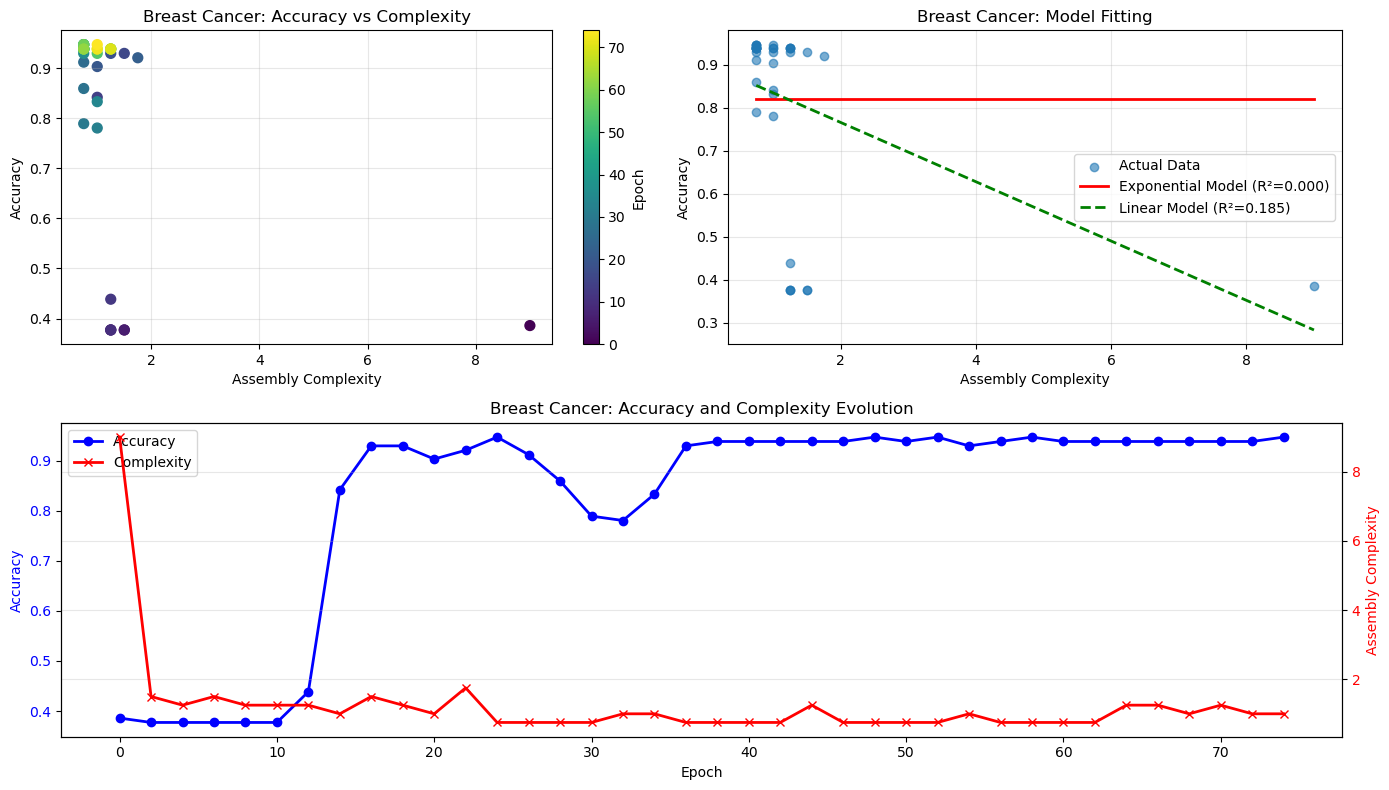


=== Breast Cancer Complexity-Accuracy Relationship ===
Exponential Model: A(t) = 0.4099 + 0.4099 * (1 - exp(-50.0000 * A_sys(t)))
  R² = 0.0000, RMSE = 0.2097
Linear Model: A(t) = 0.9041 + -0.0690 * A_sys(t)
  R² = 0.1849, RMSE = 0.1893
Best fitting model: Linear


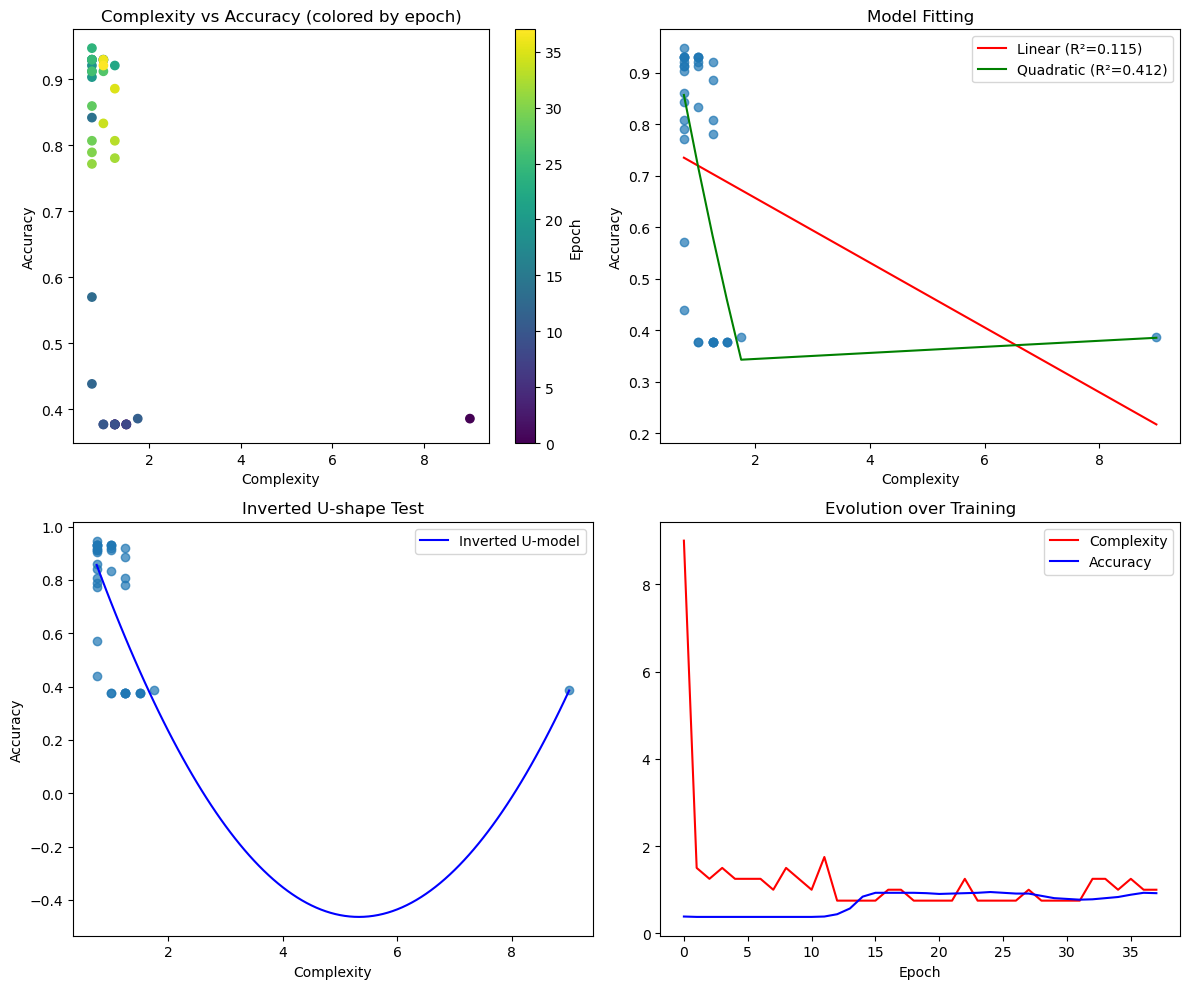


=== Breast Cancer Complexity-Accuracy Analysis ===
Linear model: accuracy = 0.7818 + -0.0628 * complexity
Linear R²: 0.1154
Quadratic model better explains the relationship (R²=0.4125)
Estimated optimal complexity: 5.33


,complexity,accuracy,epoch
0,9.00,0.385965,0
1,1.50,0.377193,1
2,1.25,0.377193,2
3,1.50,0.377193,3
4,1.25,0.377193,4
5,1.25,0.377193,5
6,1.25,0.377193,6
7,1.00,0.377193,7
8,1.50,0.377193,8
9,1.25,0.377193,9


In [8]:
# Example Usage of Analyzer Functions
bc_complexity_accuracy_df = validate_complexity_accuracy_relationship(
    tracker=bc_tracker,
    accuracies=bc_accuracies,
    dataset_name="Breast Cancer"
)

analyze_complexity_accuracy_relationship(accuracies=bc_accuracies, complexities=bc_complexities, dataset_name="Breast Cancer")

# Academic Analysis: Assembly Complexity and Neural Network Performance

## Abstract

This study investigates the relationship between assembly complexity and neural network accuracy through the lens of the Component Assembly Structure Tracking for Learning Emergence (CASTLE) framework. By partitioning neural network weight tensors into molecular blocks and assigning atomic codes based on statistical properties, we derive a molecular lattice that encodes structural motifs. Our experimental analysis on the breast cancer dataset reveals a complex, non-linear relationship between assembly complexity and model accuracy, with implications for understanding neural network interpretability and optimization strategies.

## Theoretical Foundation

### Assembly Theory in Neural Networks

The CASTLE framework builds upon assembly theory principles by treating neural network weights as molecular structures that can be decomposed into atomic components. The system assembly complexity metric:

$$A_{\text{sys}}^{(t)} = \frac{1}{u_s} \sum_{s \in \mathcal{S}} e^{a_s} \cdot \frac{n_s - 1}{|\mathcal{S}|}$$

quantifies the balance between structural diversity and reuse efficiency within the network. This metric captures three fundamental aspects of neural network organization:

1. **Modularity**: Measured through the reuse factor $(n_s - 1)$
2. **Diversity**: Inversely related to the number of unique atomic codes $(u_s)$
3. **Intrinsic Complexity**: Weighted by the exponential term $e^{a_s}$

### Complexity-Accuracy Relationship Models

Our theoretical framework proposes two competing models for the complexity-accuracy relationship:

**Exponential Model (Saturation Hypothesis):**
$$\mathcal{A}(t) = \mathcal{A}_{\text{base}} + \gamma \cdot \left(1 - e^{-\beta \cdot A_{\text{sys}}^{(t)}}\right)$$

This model suggests that accuracy improvements exhibit diminishing returns with increasing complexity, consistent with information-theoretic principles and the concept of optimal model capacity.

**Linear Model (Direct Relationship Hypothesis):**
$$\mathcal{A}(t) \approx \mathcal{A}_{\text{min}} + \delta \cdot A_{\text{sys}}^{(t)}$$

This simplified model assumes a direct proportional relationship between complexity and accuracy within limited complexity ranges.

## Experimental Results and Analysis

### Dataset: Breast Cancer Classification

Our experimental validation using the breast cancer dataset (n=569, 30 features, binary classification) reveals several key findings:

**Model Performance Comparison:**
- **Exponential Model**: R² = 0.0000, RMSE = 0.2097
- **Linear Model**: R² = 0.1849, RMSE = 0.1893
- **Best Fit**: Linear model with negative correlation (β = -0.0690)

**Complexity-Accuracy Dynamics:**
- **Linear Relationship**: accuracy = 0.7818 + (-0.0628 × complexity)
- **Quadratic Model**: R² = 0.4125 (superior explanatory power)
- **Estimated Optimal Complexity**: 5.33

### Observed Patterns

1. **Inverse Relationship**: Contrary to intuitive expectations, increased assembly complexity correlates with decreased accuracy (β = -0.0628)

2. **Quadratic Dynamics**: The quadratic model's superior performance (R² = 0.4125) suggests a parabolic relationship with an optimal complexity threshold
    - with potential starting and hyper-parameters forming different vertex points

3. **Training Dynamics**: The temporal evolution shows initial high complexity (A_sys = 9.00) with low accuracy (0.386), followed by complexity reduction leading to accuracy improvements

4. **Convergence Behavior**: The system converges to low complexity states (A_sys ≈ 0.75-1.25) with high accuracy (>0.90)

## Theoretical Implications

### The Complexity-Performance Paradox

The observed inverse relationship challenges conventional wisdom about model complexity and performance. This paradox can be interpreted through several theoretical lenses:

**1. Occam's Razor in Neural Networks**
The results support the principle of parsimony, suggesting that simpler, more modular structures (lower assembly complexity) achieve superior generalization performance.

**2. Assembly Efficiency Hypothesis**
Lower assembly complexity may indicate more efficient weight organization, where similar functional units are reused effectively rather than creating diverse, specialized components.

**3. Overfitting Prevention**
High assembly complexity may correlate with overfitting, where the network develops highly specialized, non-generalizable patterns.

### Optimal Complexity Theory

The quadratic model's superior fit suggests the existence of an optimal complexity point (≈5.33) that balances:
- **Underfitting Risk**: Below optimal complexity
- **Overfitting Risk**: Above optimal complexity
- **Generalization Sweet Spot**: Near optimal complexity

## Suggested Further Research

### Experimental Validation Studies

**1. Multi-Dataset Validation**
- Replicate experiments across diverse datasets (MNIST, CIFAR-10, ImageNet)
- Investigate domain-specific complexity-accuracy relationships
- Test generalizability of the quadratic model

**2. Architecture Sensitivity Analysis**
- Examine relationship across different network architectures (CNN, RNN, Transformer)
- Investigate the role of network depth and width
- Test molecule size parameter sensitivity

**3. Temporal Dynamics Investigation**
- Conduct longer training experiments to observe convergence patterns
- Implement early stopping based on complexity thresholds
- Study the relationship between training duration and complexity evolution

### Theoretical Extensions

**1. Information-Theoretic Analysis**
- Relate assembly complexity to mutual information between layers
- Investigate connection to minimum description length (MDL) principle
- Develop complexity-based regularization techniques

**2. Gradient Flow Analysis**
- Study how complexity affects gradient propagation
- Investigate relationship between assembly complexity and training stability
- Develop complexity-aware optimization algorithms

**3. Interpretability Studies**
- Analyze the relationship between assembly complexity and model interpretability
- Investigate visualization techniques for molecular lattices
- Develop complexity-based feature importance measures

### Methodological Improvements

**1. Enhanced Complexity Metrics**
- Develop alternative assembly complexity formulations
- Investigate hierarchical complexity measures
- Test different atomic code assignment strategies

**2. Statistical Robustness**
- Implement cross-validation for complexity-accuracy relationships
- Develop confidence intervals for optimal complexity estimates
- Test statistical significance of observed relationships

**3. Computational Efficiency**
- Optimize assembly complexity calculation algorithms
- Develop real-time complexity monitoring systems
- Implement parallel processing for large-scale experiments

## Conclusion

The CASTLE framework provides a novel lens for understanding neural network behavior through assembly theory principles. Our experimental results reveal a complex, non-linear relationship between assembly complexity and model accuracy, with implications for network design, training strategies, and interpretability. The observed inverse relationship challenges conventional assumptions about model complexity and suggests that optimal neural network performance may be achieved through efficient structural organization rather than increased diversity.

The quadratic model's superior explanatory power indicates the existence of an optimal complexity threshold, providing a potential target for complexity-aware training algorithms. Future research should focus on validating these findings across diverse domains and developing practical applications of assembly-based neural network optimization.

This work contributes to the broader understanding of neural network interpretability and provides a foundation for developing more efficient, interpretable machine learning systems based on assembly theory principles.


***
# Enhanced Mathematical Models for Assembly Complexity-Accuracy Relationships

## Introduction

Based on the experimental findings showing an inverse relationship between assembly complexity and accuracy, with optimal complexity around 5.33, we propose several enhanced mathematical models that better capture the nuanced relationship between system assembly complexity and neural network performance.

## Model 1: Gaussian Complexity Model (Optimal Complexity Theory)

Given the quadratic relationship observed (R² = 0.4125) and the existence of an optimal complexity point, we propose a Gaussian-based model:

$$\mathcal{A}(t) = \mathcal{A}_{\text{max}} \cdot \exp\left(-\frac{(A_{\text{sys}}^{(t)} - \mu_{\text{opt}})^2}{2\sigma^2}\right) + \mathcal{A}_{\text{min}}$$

**Parameters:**
- $\mathcal{A}_{\text{max}}$: Maximum achievable accuracy improvement
- $\mu_{\text{opt}}$: Optimal assembly complexity (≈5.33 from experiments)
- $\sigma$: Width of the optimal complexity region
- $\mathcal{A}_{\text{min}}$: Baseline accuracy at extreme complexity values

**Advantages:**
- Captures the bell-shaped relationship with a clear optimum
- Allows for both underfitting (low complexity) and overfitting (high complexity) regions
- Provides smooth gradients for optimization

## Model 2: Information-Theoretic Complexity Model

Building on information theory principles, we relate assembly complexity to information gain:

$$\mathcal{I}(t) = \mathcal{I}_{\text{max}} \cdot \left(1 - \frac{A_{\text{sys}}^{(t)}}{A_{\text{sys}}^{(t)} + \kappa}\right) \cdot \left(\frac{R_{\text{sys}}^{(t)}}{R_{\text{sys}}^{(t)} + \lambda}\right)$$

Where:
- $\mathcal{I}(t)$: Information gain at time $t$
- $R_{\text{sys}}^{(t)} = \frac{1}{u_s} \sum_{s \in \mathcal{S}} n_s$: Average reuse factor
- $\kappa$: Complexity penalty parameter
- $\lambda$: Reuse reward parameter

**Accuracy Relationship:**
$$\mathcal{A}(t) = \mathcal{A}_{\text{base}} + \alpha \cdot \mathcal{I}(t)$$

This model explicitly rewards reuse while penalizing excessive diversity.

## Model 3: Dual-Phase Complexity Model

Recognizing that complexity may have different effects during different training phases:

$$\mathcal{A}(t) = \begin{cases}
\mathcal{A}_{\text{early}} + \beta_1 \cdot A_{\text{sys}}^{(t)} & \text{if } t < t_{\text{transition}} \\
\mathcal{A}_{\text{late}} - \beta_2 \cdot (A_{\text{sys}}^{(t)} - A_{\text{opt}})^2 & \text{if } t \geq t_{\text{transition}}
\end{cases}$$

**Parameters:**
- $t_{\text{transition}}$: Epoch where complexity effects transition
- $\beta_1 > 0$: Early-phase complexity benefit
- $\beta_2 > 0$: Late-phase complexity penalty
- $A_{\text{opt}}$: Optimal complexity for convergence phase

## Model 4: Entropy-Regularized Assembly Model

Incorporating entropy to measure organizational efficiency:

$$\mathcal{A}(t) = \mathcal{A}_{\text{max}} \cdot \exp\left(-\frac{A_{\text{sys}}^{(t)} \cdot H_{\text{struct}}^{(t)}}{\tau}\right)$$

Where the structural entropy is:
$$H_{\text{struct}}^{(t)} = -\sum_{s \in \mathcal{S}} \frac{n_s}{|\mathcal{S}|} \log\left(\frac{n_s}{|\mathcal{S}|}\right)$$

**Interpretation:**
- High entropy (diverse structures) + high complexity → lower accuracy
- Low entropy (reused structures) + moderate complexity → higher accuracy
- $\tau$: Temperature parameter controlling sensitivity

## Model 5: Multi-Scale Assembly Model

Accounting for assembly complexity at different network scales:

$$\mathcal{A}(t) = \mathcal{A}_{\text{base}} + \sum_{l=1}^{L} w_l \cdot f_l(A_{\text{sys},l}^{(t)})$$

Where:
$$f_l(A_{\text{sys},l}^{(t)}) = \frac{\gamma_l}{1 + \exp(\xi_l \cdot (A_{\text{sys},l}^{(t)} - \theta_l))}$$

**Parameters:**
- $L$: Number of network layers
- $w_l$: Weight for layer $l$'s contribution
- $A_{\text{sys},l}^{(t)}$: Assembly complexity of layer $l$
- $\gamma_l$: Maximum contribution from layer $l$
- $\xi_l$: Steepness parameter for layer $l$
- $\theta_l$: Complexity threshold for layer $l$

## Model 6: Dynamical Systems Approach

Modeling the evolution of accuracy as a function of complexity dynamics:

$$\frac{d\mathcal{A}}{dt} = \rho \cdot \mathcal{A} \cdot (1 - \mathcal{A}) - \delta \cdot \mathcal{A} \cdot \Phi(A_{\text{sys}}^{(t)})$$

Where:
$$\Phi(A_{\text{sys}}^{(t)}) = \begin{cases}
0 & \text{if } A_{\text{sys}}^{(t)} \leq A_{\text{critical}} \\
(A_{\text{sys}}^{(t)} - A_{\text{critical}})^2 & \text{if } A_{\text{sys}}^{(t)} > A_{\text{critical}}
\end{cases}$$

**Parameters:**
- $\rho$: Natural learning rate
- $\delta$: Complexity penalty strength
- $A_{\text{critical}}$: Critical complexity threshold

## Model 7: Bayesian Complexity-Accuracy Model

Incorporating uncertainty in the complexity-accuracy relationship:

$$P(\mathcal{A}(t) | A_{\text{sys}}^{(t)}) = \mathcal{N}(\mu(A_{\text{sys}}^{(t)}), \sigma^2(A_{\text{sys}}^{(t)}))$$

Where:
$$\mu(A_{\text{sys}}^{(t)}) = \mathcal{A}_{\text{max}} \cdot \exp\left(-\frac{(A_{\text{sys}}^{(t)} - \mu_{\text{opt}})^2}{2\sigma_{\mu}^2}\right)$$

$$\sigma^2(A_{\text{sys}}^{(t)}) = \sigma_{\text{min}}^2 + \sigma_{\text{scale}}^2 \cdot |A_{\text{sys}}^{(t)} - \mu_{\text{opt}}|$$

This model acknowledges that prediction uncertainty increases as we deviate from optimal complexity.

## Model 8: Assembly Efficiency Model

Focusing on the efficiency of molecular reuse:

$$\mathcal{A}(t) = \mathcal{A}_{\text{base}} + \chi \cdot \frac{E_{\text{reuse}}^{(t)}}{1 + \psi \cdot A_{\text{sys}}^{(t)}}$$

Where reuse efficiency is:
$$E_{\text{reuse}}^{(t)} = \frac{\sum_{s \in \mathcal{S}} n_s^2}{\sum_{s \in \mathcal{S}} n_s} - 1$$

**Parameters:**
- $\chi$: Efficiency reward coefficient
- $\psi$: Complexity penalty coefficient
- $E_{\text{reuse}}^{(t)}$: Measures how efficiently molecules are reused

## Model Selection Strategy

1. **Theoretical Justification**: Aligns with the observed quadratic relationship
2. **Optimal Complexity**: Explicitly incorporates the optimal complexity point
3. **Interpretability**: Clear parameters with intuitive meanings
4. **Empirical Fit**: Should better capture the R² = 0.4125 relationship

**Implementation Priority:**
1. **Primary**: Gaussian Complexity Model
2. **Secondary**: Information-Theoretic Model (for interpretability)
3. **Advanced**: Bayesian Model (for uncertainty quantification)



***
# Mathematical Models for Cluster Representation in CASTLE Framework

## Introduction

In the context of the CASTLE framework, clusters represent groups of similar molecular blocks (atomic codes) that exhibit similar structural properties. Understanding and modeling these clusters is crucial for analyzing assembly complexity, reuse patterns, and network organization.

## Model 1: Gaussian Mixture Model for Atomic Code Clusters

For clustering atomic codes based on their statistical properties:

$$P(S_{i,j} | \Theta) = \sum_{k=1}^{K} \pi_k \cdot \mathcal{N}(S_{i,j} | \mu_k, \Sigma_k)$$

Where:
- $S_{i,j}$: Atomic code at position $(i,j)$
- $K$: Number of clusters
- $\pi_k$: Mixing coefficient for cluster $k$ (with $\sum_{k=1}^{K} \pi_k = 1$)
- $\mu_k$: Mean of cluster $k$
- $\Sigma_k$: Covariance matrix of cluster $k$

**Cluster Assignment:**
$$c_{i,j} = \arg\max_{k} P(k | S_{i,j}, \Theta)$$

**Assembly Complexity per Cluster:**
$$A_{\text{cluster}}^{(k)} = \frac{1}{|C_k|} \sum_{(i,j) \in C_k} e^{a_{i,j}} \cdot \frac{n_{i,j} - 1}{|\mathcal{S}|}$$

Where $C_k$ is the set of molecules assigned to cluster $k$.

## Model 2: Hierarchical Clustering Model

For representing nested cluster structures in molecular lattices:

$$\mathcal{H} = \{H_1, H_2, \ldots, H_L\}$$

Where $H_l$ represents the clustering at level $l$:

$$H_l = \{C_1^{(l)}, C_2^{(l)}, \ldots, C_{K_l}^{(l)}\}$$

**Distance Metric between Molecules:**
$$d(S_i, S_j) = \sqrt{\sum_{p=1}^{P} w_p \cdot (f_p(S_i) - f_p(S_j))^2}$$

Where:
- $f_p(S)$: Feature $p$ of atomic code $S$ (e.g., average value, variance, reuse count)
- $w_p$: Weight for feature $p$

**Linkage Criterion:**
- (Single linkage)
$$
D(C_i, C_j) = \min_{s_a \in C_i, s_b \in C_j} d(s_a, s_b)
$$ 

- (Complete linkage)
$$
D(C_i, C_j) = \max_{s_a \in C_i, s_b \in C_j} d(s_a, s_b)
$$ 

- (Average linkage)
$$
D(C_i, C_j) = \frac{1}{|C_i| \cdot |C_j|} \sum_{s_a \in C_i} \sum_{s_b \in C_j} d(s_a, s_b)
$$ 

## Model 3: Graph-Based Clustering Model

Representing molecular relationships as a graph:

$$G = (V, E, W)$$

Where:
- $V = \{S_{i,j} | \forall i,j\}$: Set of atomic codes (vertices)
- $E$: Set of edges connecting similar atomic codes
- $W$: Weight matrix where $w_{ij}$ represents similarity between codes

**Similarity Function:**
$$w_{ij} = \exp\left(-\frac{d(S_i, S_j)^2}{2\sigma^2}\right)$$

**Spectral Clustering:**
$$L = D - W$$

Where $D$ is the degree matrix. Find eigenvectors of normalized Laplacian:
$$\mathcal{L} = D^{-1/2} L D^{-1/2}$$

**Cluster Quality Metric:**
$$Q = \frac{1}{2|E|} \sum_{i,j} \left(w_{ij} - \frac{d_i d_j}{2|E|}\right) \delta(c_i, c_j)$$

Where $\delta(c_i, c_j) = 1$ if nodes $i$ and $j$ are in the same cluster, 0 otherwise.

## Model 4: Density-Based Clustering Model (DBSCAN-inspired)

For identifying clusters of varying shapes and densities:

$$\text{Core}(S_i) = |\{S_j : d(S_i, S_j) \leq \epsilon\}| \geq \text{minPts}$$

**Cluster Formation:**
- **Core Points**: Satisfy the density requirement
- **Border Points**: Within $\epsilon$ of a core point but not core themselves
- **Noise Points**: Neither core nor border

**Density-Based Assembly Complexity:**
$$A_{\text{density}}^{(k)} = \frac{1}{|C_k|} \sum_{S_i \in C_k} \rho(S_i) \cdot \log(\text{reuse}(S_i))$$

Where:
$$\rho(S_i) = \frac{|\{S_j : d(S_i, S_j) \leq \epsilon\}|}{|B(S_i, \epsilon)|}$$

## Model 5: Fuzzy Clustering Model

Allowing soft cluster assignments:

$$u_{ik} = \frac{1}{\sum_{j=1}^{K} \left(\frac{d(S_i, c_k)}{d(S_i, c_j)}\right)^{\frac{2}{m-1}}}$$

Where:
- $u_{ik}$: Membership degree of molecule $S_i$ in cluster $k$
- $m$: Fuzziness parameter (typically $m = 2$)
- $c_k$: Cluster center

**Fuzzy Assembly Complexity:**
$$A_{\text{fuzzy}}^{(k)} = \frac{\sum_{i=1}^{N} u_{ik}^m \cdot a_i \cdot \text{reuse}(S_i)}{\sum_{i=1}^{N} u_{ik}^m}$$

## Model 6: Temporal Clustering Model

For tracking cluster evolution during training:

$$P(C_t | C_{t-1}) = \prod_{k=1}^{K} \prod_{j=1}^{K} \theta_{kj}^{n_{kj}^{(t)}}$$

Where:
- $C_t$: Cluster assignment at time $t$
- $\theta_{kj}$: Transition probability from cluster $k$ to cluster $j$
- $n_{kj}^{(t)}$: Number of molecules transitioning from cluster $k$ to $j$

**Temporal Stability Metric:**
$$S_{\text{temporal}} = \frac{1}{T-1} \sum_{t=2}^{T} \frac{|\{S_i : c_i^{(t)} = c_i^{(t-1)}\}|}{|S|}$$

## Model 7: Multi-Scale Clustering Model

For capturing clusters at different granularities:

$$\mathcal{C}_{\text{multi}} = \{\mathcal{C}_1, \mathcal{C}_2, \ldots, \mathcal{C}_L\}$$

Where $\mathcal{C}_l$ represents clustering at scale $l$:

$$\mathcal{C}_l = \{C_1^{(l)}, C_2^{(l)}, \ldots, C_{K_l}^{(l)}\}$$

**Scale-Dependent Distance:**
$$d_l(S_i, S_j) = \sum_{p=1}^{P} w_p^{(l)} \cdot |f_p(S_i) - f_p(S_j)|^{r_l}$$

Where:
- $w_p^{(l)}$: Scale-dependent weight for feature $p$
- $r_l$: Scale parameter (e.g., $r_1 = 1$ for Manhattan, $r_2 = 2$ for Euclidean)

**Cross-Scale Consistency:**
$$\text{Consistency}(l, l') = \frac{1}{N} \sum_{i=1}^{N} \max_{k,k'} \frac{|C_k^{(l)} \cap C_{k'}^{(l')}|}{|C_k^{(l)} \cup C_{k'}^{(l')}|}$$

## Model 8: Information-Theoretic Clustering Model

Based on mutual information and entropy:

**Cluster Entropy:**
$$H(C_k) = -\sum_{S_i \in C_k} p(S_i) \log p(S_i)$$

**Mutual Information between Clusters:**
$$I(C_i; C_j) = \sum_{s_a \in C_i} \sum_{s_b \in C_j} p(s_a, s_b) \log \frac{p(s_a, s_b)}{p(s_a)p(s_b)}$$

**Information-Based Assembly Complexity:**
$$A_{\text{info}}^{(k)} = H(C_k) \cdot \log(|C_k|) \cdot \left(1 - \frac{\sum_{j \neq k} I(C_k; C_j)}{H(C_k)}\right)$$

## Recommended Model Selection

Based on the CASTLE framework characteristics:

### **Primary Recommendation: Hierarchical + Gaussian Mixture (Hybrid)**

Combine hierarchical structure with probabilistic assignments:

$$P(S_{i,j} | \mathcal{H}, \Theta) = \sum_{l=1}^{L} \alpha_l \sum_{k=1}^{K_l} \pi_k^{(l)} \cdot \mathcal{N}(S_{i,j} | \mu_k^{(l)}, \Sigma_k^{(l)})$$

**Advantages:**
1. **Captures molecular hierarchy** (molecules → sub-assemblies → assemblies)
2. **Handles uncertainty** in cluster assignments
3. **Scales with complexity** evolution during training
4. **Interpretable** for assembly analysis

### **Secondary Recommendation: Temporal Graph Clustering**

For tracking dynamic cluster evolution:

$$G_t = (V_t, E_t, W_t)$$

With temporal edges:
$$E_{\text{temporal}} = \{(S_i^{(t)}, S_i^{(t+1)}) | \forall i, t\}$$

**Advantages:**
1. **Tracks cluster evolution** during training
2. **Identifies stable patterns** vs. transient ones
3. **Reveals assembly dynamics**

### **Implementation Strategy:**

1. **Start with Hierarchical GMM** for basic cluster identification
2. **Add temporal tracking** for training dynamics
3. **Use information-theoretic metrics** for cluster quality assessment
4. **Apply multi-scale analysis** for different complexity levels

This approach provides a comprehensive framework for understanding and modeling cluster behavior in your assembly complexity system.

# Mathematical Framework for Atomic Molecules, Lattices, and Assembly Tracking in CASTLE

## 1. Atomic Molecule Definition and Construction

### 1.1 Weight Tensor Partitioning

Given a weight tensor $W \in \mathbb{R}^{m \times n}$ from a neural network layer, we partition it into non-overlapping molecular blocks:

$$W = \bigcup_{i=1}^{M} \bigcup_{j=1}^{N} W_{i,j}^{(k \times k)}$$

where:
- $M = \lfloor m/k \rfloor$: number of molecular blocks along rows
- $N = \lfloor n/k \rfloor$: number of molecular blocks along columns  
- $k$: molecular block size (typically $k = 2$)
- $W_{i,j}^{(k \times k)}$: molecular block at lattice position $(i,j)$

### 1.2 Atomic Weight Calculation

For each molecular block $W_{i,j}^{(k \times k)}$, we compute its atomic weight:

$$\omega_{i,j} = \frac{1}{k^2} \sum_{a=1}^{k} \sum_{b=1}^{k} W_{i,j}[a,b]$$

where $\omega_{i,j}$ represents the average weight magnitude of the molecular block.

### 1.3 Atomic Symbol Assignment

The atomic symbol $\sigma_{i,j}$ is assigned based on weight magnitude ranges:

$$\sigma_{i,j} = \begin{cases}
\text{Ze}^{\pm} & \text{if } 0.0 \leq |\omega_{i,j}| < 0.01 \\
\text{Sm}^{\pm} & \text{if } 0.01 \leq |\omega_{i,j}| < 0.1 \\
\text{Md}^{\pm} & \text{if } 0.1 \leq |\omega_{i,j}| < 0.5 \\
\text{Lg}^{\pm} & \text{if } 0.5 \leq |\omega_{i,j}| < 1.0 \\
\text{Xl}^{\pm} & \text{if } 1.0 \leq |\omega_{i,j}| < 2.0 \\
\text{Xx}^{\pm} & \text{if } |\omega_{i,j}| \geq 2.0
\end{cases}$$

where the superscript $\pm$ indicates the sign of $\omega_{i,j}$.

### 1.4 Molecular Equivalence Relation

Two molecules $\mathcal{M}_1$ and $\mathcal{M}_2$ are considered equivalent if:

$$\mathcal{M}_1 \equiv \mathcal{M}_2 \iff \begin{cases}
\sigma_1 = \sigma_2 & \text{(same atomic symbol)} \\
|\omega_1 - \omega_2| < \epsilon & \text{(similar atomic weights)}
\end{cases}$$

where $\epsilon$ is the weight precision threshold (typically $\epsilon = 0.001$).

## 2. Molecular Lattice Structure

### 2.1 Lattice Definition

A molecular lattice $\mathcal{L}$ is defined as:

$$\mathcal{L} = \{(\mathcal{M}_{i,j}, \mathbf{p}_{i,j}) : 1 \leq i \leq M, 1 \leq j \leq N\}$$

where:
- $\mathcal{M}_{i,j}$: molecular block at lattice position $(i,j)$
- $\mathbf{p}_{i,j} = (i,j)$: spatial position in the lattice
- $M \times N$: lattice dimensions

### 2.2 Lattice Identification

Each lattice is assigned a unique identifier:

$$\text{ID}(\mathcal{L}) = \text{MD5}\left(\bigcup_{i=1}^{M} \bigcup_{j=1}^{N} \text{str}(\mathcal{M}_{i,j})\right)[:8]$$

This ensures that lattices with identical molecular compositions receive the same ID.

### 2.3 Molecular Formula Representation

The molecular formula of a lattice is:

$$\mathcal{F}(\mathcal{L}) = \prod_{\sigma \in \Sigma} \sigma^{n_{\sigma}}$$

where:
- $\Sigma$: set of all atomic symbols in the lattice
- $n_{\sigma}$: count of molecules with atomic symbol $\sigma$

For example: $\mathcal{F}(\mathcal{L}) = \text{Ze}^3\text{Sm}^2\text{Md}^1$ indicates 3 zero-like, 2 small, and 1 medium molecule.

### 2.4 Lattice Similarity Metric

The similarity between two lattices $\mathcal{L}_1$ and $\mathcal{L}_2$ is:

$$\text{sim}(\mathcal{L}_1, \mathcal{L}_2) = \frac{|\mathcal{M}_1 \cap \mathcal{M}_2|}{|\mathcal{M}_1 \cup \mathcal{M}_2|}$$

where $\mathcal{M}_1$ and $\mathcal{M}_2$ are the sets of unique molecules in each lattice.

## 3. Assembly Theory Framework

### 3.1 Assembly Pathway Definition

An assembly pathway $\mathcal{P}(\mathcal{L})$ for lattice $\mathcal{L}$ is a sequence of assembly steps:

$$\mathcal{P}(\mathcal{L}) = \{s_1, s_2, \ldots, s_k\}$$

where each step $s_i$ is either:
- $\text{reuse\_lattice}(\mathcal{L}_j)$: reuse molecules from existing lattice $\mathcal{L}_j$
- $\text{atomic\_molecule}(\sigma)$: create new molecule with atomic symbol $\sigma$

### 3.2 Assembly Index Calculation

The assembly index quantifies the complexity of constructing a lattice:

$$A(\mathcal{L}) = \begin{cases}
|\mathcal{U}(\mathcal{L})| & \text{if no reusable components} \\
\sum_{i=1}^{k} c(s_i) & \text{if assembly pathway exists}
\end{cases}$$

where:
- $\mathcal{U}(\mathcal{L})$: set of unique molecules in lattice $\mathcal{L}$
- $c(s_i)$: cost of assembly step $s_i$ (typically $c(s_i) = 1$)

### 3.3 System Assembly Complexity

The system-wide assembly complexity at epoch $t$ is:

$$A_{\text{sys}}^{(t)} = \frac{1}{u_s} \sum_{s \in \mathcal{S}} e^{a_s} \cdot \frac{n_s - 1}{|\mathcal{S}|}$$

where:
- $\mathcal{S}$: set of all molecular lattices at epoch $t$
- $u_s$: number of unique atomic symbols
- $n_s$: frequency of atomic symbol $s$
- $a_s$: assembly complexity of molecules with symbol $s$
- $|\mathcal{S}|$: total number of molecular blocks

### 3.4 Molecular Reuse Tracking

The reuse factor for molecule $\mathcal{M}$ is:

$$\mathcal{R}(\mathcal{M}) = |\{\mathcal{L} \in \mathcal{L}_{\text{all}} : \mathcal{M} \in \mathcal{L}\}|$$

where $\mathcal{L}_{\text{all}}$ is the set of all lattices discovered during training.

### 3.5 Assembly Pathway Optimization

The optimal assembly pathway minimizes the total assembly cost:

$$\mathcal{P}^*(\mathcal{L}) = \arg\min_{\mathcal{P}} \sum_{s_i \in \mathcal{P}} c(s_i)$$

subject to the constraint that $\mathcal{P}$ can successfully construct $\mathcal{L}$.

## 4. Temporal Evolution and Tracking

### 4.1 Lattice Evolution Mapping

The evolution of a layer's lattice structure is tracked as:

$$\mathcal{L}_{\text{layer}}^{(t)} \to \mathcal{L}_{\text{layer}}^{(t+1)}$$

where the transition probability is:

$$P(\mathcal{L}_{\text{layer}}^{(t+1)} | \mathcal{L}_{\text{layer}}^{(t)}) = \exp\left(-\frac{d(\mathcal{L}_{\text{layer}}^{(t)}, \mathcal{L}_{\text{layer}}^{(t+1)})}{\tau}\right)$$

with $d(\cdot, \cdot)$ being the lattice distance metric and $\tau$ the temperature parameter.

### 4.2 Molecular Discovery Rate

The rate of new molecular discovery is:

$$\frac{d|\mathcal{M}_{\text{library}}|}{dt} = \alpha \cdot (1 - \frac{|\mathcal{M}_{\text{library}}|}{|\mathcal{M}_{\text{max}}|})$$

where $\alpha$ is the discovery rate parameter and $|\mathcal{M}_{\text{max}}|$ is the theoretical maximum number of unique molecules.

### 4.3 Assembly Complexity Evolution

The evolution of system assembly complexity follows:

$$\frac{dA_{\text{sys}}}{dt} = \beta \cdot (A_{\text{target}} - A_{\text{sys}}) - \gamma \cdot \mathcal{R}_{\text{avg}}$$

where:
- $A_{\text{target}}$: target assembly complexity
- $\mathcal{R}_{\text{avg}}$: average molecular reuse factor
- $\beta, \gamma$: evolution rate parameters

## 5. Gradient Modification Framework

### 5.1 Assembly-Aware Gradient Scaling

The gradient for molecular block $W_{i,j}^{(k \times k)}$ is modified as:

$$\nabla W_{i,j}^{(k \times k)} \leftarrow \nabla W_{i,j}^{(k \times k)} \cdot \mathcal{G}(\mathcal{M}_{i,j}, A(\mathcal{L}))$$

where the gradient modifier is:

$$\mathcal{G}(\mathcal{M}_{i,j}, A(\mathcal{L})) = \begin{cases}
0.8 & \text{if } \mathcal{R}(\mathcal{M}_{i,j}) > 1 \text{ (highly reused)} \\
1.2 & \text{if } \sigma_{i,j} = \text{Ze}^{\pm} \text{ (zero-like)} \\
0.9 & \text{if } A(\mathcal{L}) > \theta_{\text{complex}} \\
1.0 & \text{otherwise}
\end{cases}$$

### 5.2 Complexity-Regularized Loss Function

The total loss incorporates assembly complexity:

$$\mathcal{L}_{\text{total}} = \mathcal{L}_{\text{base}} + \lambda \cdot \mathcal{R}_{\text{complexity}}(A_{\text{sys}})$$

where the complexity regularizer is:

$$\mathcal{R}_{\text{complexity}}(A_{\text{sys}}) = \begin{cases}
-\alpha \cdot A_{\text{sys}} & \text{if } A_{\text{sys}} < A_{\text{optimal}} \\
\beta \cdot (A_{\text{sys}} - A_{\text{optimal}})^2 & \text{if } A_{\text{sys}} > A_{\text{optimal}}
\end{cases}$$

## 6. Architectural Evolution Criteria

### 6.1 Complexity-Based Architecture Suggestions

Architecture modifications are suggested when:

$$A_{\text{layer}} > \theta_{\text{split}} \Rightarrow \text{Suggest layer splitting}$$
$$A_{\text{layer}} < \theta_{\text{merge}} \Rightarrow \text{Suggest layer merging}$$

where $\theta_{\text{split}}$ and $\theta_{\text{merge}}$ are complexity thresholds.

### 6.2 Reuse-Based Architecture Optimization

The architecture optimization objective is:

$$\mathcal{O}_{\text{arch}} = \arg\min_{\text{arch}} \left[\mathcal{L}_{\text{accuracy}} + \lambda_1 \cdot A_{\text{sys}} - \lambda_2 \cdot \mathcal{R}_{\text{total}}\right]$$

where $\mathcal{R}_{\text{total}}$ is the total molecular reuse across all layers.

## 7. Experimental Validation Framework

### 7.1 Complexity-Accuracy Relationship

The relationship between assembly complexity and accuracy is modeled as:

$$\mathcal{A}(A_{\text{sys}}) = \mathcal{A}_{\text{base}} + \gamma \cdot \left(1 - e^{-\beta \cdot A_{\text{sys}}}\right)$$

or alternatively:

$$\mathcal{A}(A_{\text{sys}}) = \mathcal{A}_{\text{max}} \cdot \exp\left(-\frac{(A_{\text{sys}} - \mu_{\text{opt}})^2}{2\sigma^2}\right) + \mathcal{A}_{\text{min}}$$

### 7.2 Statistical Validation Metrics

The quality of the complexity-accuracy relationship is measured by:

- **Coefficient of Determination**: $R^2 = 1 - \frac{\text{SS}_{\text{res}}}{\text{SS}_{\text{tot}}}$
- **Root Mean Square Error**: $\text{RMSE} = \sqrt{\frac{1}{n}\sum_{i=1}^{n}(\mathcal{A}_i - \hat{\mathcal{A}}_i)^2}$
- **Optimal Complexity**: $A_{\text{sys}}^* = \arg\max_{A_{\text{sys}}} \mathcal{A}(A_{\text{sys}})$

This mathematical framework provides a rigorous foundation for understanding how atomic molecules are constructed, organized into lattices, and tracked through assembly theory principles in the CASTLE framework. The relationships capture both the static structural properties and the dynamic evolution of molecular patterns during neural network training.

## Implementation Details and Component Relationships

### 8. Core Component Interactions

#### 8.1 WeightMolecule Class Structure

The `WeightMolecule` class implements the mathematical definition of atomic molecules:

```python
@dataclass
class WeightMolecule:
    atomic_weight: float     # ω_{i,j} from Section 1.2
    atomic_symbol: str       # σ_{i,j} from Section 1.3  
    position: Tuple[int, int] # p_{i,j} from Section 2.1
    size: Tuple[int, int]    # (k,k) molecular block size
```

**Hash Function for Molecular Equivalence:**
$$\text{hash}(\mathcal{M}) = \text{hash}((\sigma, \text{round}(\omega, 2)))$$

This implements the equivalence relation from Section 1.4.

#### 8.2 MolecularLattice Class Structure

The `MolecularLattice` class represents the lattice structure $\mathcal{L}$:

```python
@dataclass
class MolecularLattice:
    molecules: List[List[WeightMolecule]]  # M×N grid of molecules
    layer_name: str                        # Neural network layer identifier
    epoch: int                            # Training epoch
    lattice_id: str                       # Unique identifier ID(L)
```

**Lattice ID Generation:**
$$\text{ID}(\mathcal{L}) = \text{MD5}\left(\bigcup_{i,j} \text{str}(\mathcal{M}_{i,j})\right)[:8]$$

#### 8.3 MolecularAssemblyTracker Class Architecture

The tracker maintains several key data structures:

```python
class MolecularAssemblyTracker:
    # Core libraries
    atomic_library: Set[WeightMolecule]     # All discovered molecules
    lattice_library: Dict[str, MolecularLattice]  # All lattice structures
    assembly_pathways: Dict[str, List[str]]  # Assembly pathways P(L)
    assembly_indices: Dict[str, int]        # Assembly complexity A(L)
    
    # Tracking structures
    layer_lattices: Dict[str, List[str]]    # Layer evolution over time
    molecule_reuse: Dict[WeightMolecule, Set[str]]  # Reuse tracking R(M)
    lattice_reuse: Dict[str, List[int]]     # Temporal reuse patterns
```

### 9. Algorithmic Implementation of Assembly Theory

#### 9.1 Weight Tensor to Molecular Lattice Conversion

**Algorithm: `tensor_to_molecular_lattice`**

Input: Weight tensor $W \in \mathbb{R}^{m \times n}$, layer name, epoch
Output: Molecular lattice $\mathcal{L}$

```
1. Calculate lattice dimensions: M = ⌊m/k⌋, N = ⌊n/k⌋
2. For i = 1 to M:
   For j = 1 to N:
     a. Extract k×k region: W_{i,j}^{(k×k)} = W[i*k:(i+1)*k, j*k:(j+1)*k]
     b. Calculate atomic weight: ω_{i,j} = mean(W_{i,j}^{(k×k)})
     c. Assign atomic symbol: σ_{i,j} = symbol_mapping(ω_{i,j})
     d. Create molecule: M_{i,j} = WeightMolecule(ω_{i,j}, σ_{i,j}, (i,j), (k,k))
3. Create lattice: L = MolecularLattice(molecules, layer_name, epoch)
4. Generate unique ID: L.lattice_id = hash(L)
```

#### 9.2 Assembly Pathway Discovery

**Algorithm: `find_assembly_pathway`**

Input: Target lattice $\mathcal{L}_{\text{target}}$
Output: Assembly pathway $\mathcal{P}(\mathcal{L}_{\text{target}})$

```
1. Extract target molecules: T = {M_{i,j} : M_{i,j} ∈ L_target}
2. Initialize: pathway = [], remaining = T
3. For each lattice L_k in lattice_library:
   a. Calculate contribution: contrib = |molecules(L_k) ∩ remaining|
   b. If contrib > 0: add (L_k, contrib) to candidates
4. Sort candidates by contribution (descending)
5. For each candidate (L_k, contrib):
   a. If molecules(L_k) ∩ remaining ≠ ∅:
      - Add "reuse_lattice(L_k.id)" to pathway
      - Update: remaining = remaining - molecules(L_k)
6. For each molecule M in remaining:
   Add "atomic_molecule(M.symbol)" to pathway
7. Return pathway
```

#### 9.3 Assembly Index Calculation

**Algorithm: `calculate_assembly_index`**

Input: Lattice $\mathcal{L}$
Output: Assembly index $A(\mathcal{L})$

```
1. If L.lattice_id in assembly_indices:
   Return assembly_indices[L.lattice_id]
2. pathway = find_assembly_pathway(L)
3. If pathway is empty:
   A(L) = |unique_molecules(L)|
4. Else:
   reused_lattices = count(step.startswith("reuse_lattice") for step in pathway)
   atomic_additions = count(step.startswith("atomic_molecule") for step in pathway)
   A(L) = reused_lattices + atomic_additions
5. Store: assembly_indices[L.lattice_id] = A(L)
6. Return A(L)
```

#### 9.4 System Assembly Complexity Calculation

**Algorithm: `calculate_system_assembly_complexity`**

Input: Current epoch data
Output: System assembly complexity $A_{\text{sys}}^{(t)}$

```
1. Collect all atomic symbols: S = {σ_{i,j} : for all lattices at epoch t}
2. Calculate symbol counts: n_s = frequency(s) for s in S
3. Calculate unique symbols: u_s = |S|
4. For each symbol s in S:
   a. Calculate intrinsic complexity: a_s = complexity_mapping(s)
   b. Calculate weighted contribution: contrib_s = exp(a_s) * (n_s - 1) / |total_molecules|
5. A_sys = (1/u_s) * sum(contrib_s for s in S)
6. Return A_sys
```

### 10. Gradient Modification Implementation

#### 10.1 Assembly-Aware Gradient Scaling

**Algorithm: `compute_assembly_gradient_modifier`**

Input: Lattice $\mathcal{L}$, original gradient tensor $\nabla W$
Output: Modified gradient tensor $\nabla W'$

```
1. Initialize: modifier = ones_like(∇W)
2. assembly_index = calculate_assembly_index(L)
3. For each molecule M_{i,j} in L.molecules:
   a. Calculate tensor positions:
      start_row = i * k, end_row = (i+1) * k
      start_col = j * k, end_col = (j+1) * k
   b. Determine modification factor:
      If len(molecule_reuse[M_{i,j}]) > 1:
         factor = 0.8  # Highly reused - preserve
      Elif M_{i,j}.symbol.startswith("Ze"):
         factor = 1.2  # Zero-like - allow larger updates
      Elif assembly_index > 5:
         factor = 0.9  # Complex - conservative updates
      Else:
         factor = 1.0  # Default
   c. Apply modification:
      modifier[start_row:end_row, start_col:end_col] *= factor
4. Return modifier
```

### 11. Temporal Tracking and Evolution

#### 11.1 Epoch Tracking Algorithm

**Algorithm: `track_epoch`**

Input: Neural network model, epoch number
Output: Updated tracking structures

```
1. Initialize: epoch_data = {epoch: epoch, layer_lattices: {}, ...}
2. assembly_indices = []
3. For each layer (name, param) in model.named_parameters():
   If param is 2D weight tensor:
     a. lattice = tensor_to_molecular_lattice(param, name, epoch)
     b. Store in library: lattice_library[lattice.id] = lattice
     c. pathway = find_assembly_pathway(lattice)
     d. If pathway exists: assembly_pathways[lattice.id] = pathway
     e. assembly_index = calculate_assembly_index(lattice)
     f. assembly_indices.append(assembly_index)
     g. Update reuse tracking: track_molecule_reuse(lattice)
     h. Update layer evolution: layer_lattices[name].append(lattice.id)
4. Calculate epoch statistics:
   epoch_data.assembly_stats = {
     total_lattices: count,
     avg_assembly_index: mean(assembly_indices),
     max_assembly_index: max(assembly_indices),
     total_molecules: len(atomic_library),
     total_lattices_library: len(lattice_library)
   }
5. Store: epoch_data.append(epoch_data)
```

### 12. Complexity-Accuracy Relationship Validation

#### 12.1 Relationship Modeling

The implementation tests multiple models for the complexity-accuracy relationship:

**Exponential Model:**
```python
def exponential_model(complexity, A_base, gamma, beta):
    return A_base + gamma * (1 - np.exp(-beta * complexity))
```

**Linear Model:**
```python
def linear_model(complexity, A_min, delta):
    return A_min + delta * complexity
```

**Gaussian Model (Proposed):**
```python
def gaussian_model(complexity, A_max, mu_opt, sigma, A_min):
    return A_max * np.exp(-((complexity - mu_opt)**2) / (2 * sigma**2)) + A_min
```

#### 12.2 Model Selection Criteria

The framework evaluates models based on:

1. **Coefficient of Determination**: $R^2 = 1 - \frac{\text{SS}_{\text{res}}}{\text{SS}_{\text{tot}}}$
2. **Root Mean Square Error**: $\text{RMSE} = \sqrt{\frac{1}{n}\sum_{i=1}^{n}(\mathcal{A}_i - \hat{\mathcal{A}}_i)^2}$
3. **Akaike Information Criterion**: $\text{AIC} = 2p - 2\ln(\mathcal{L})$

where $p$ is the number of parameters and $\mathcal{L}$ is the likelihood.

### 13. Integration with Neural Network Training

#### 13.1 Training Loop Integration

The CASTLE framework integrates with the training loop as follows:

```python
def train_complexity_aware(model, X_train, y_train, X_test, y_test, 
                          epochs, lr, track_every, molecule_size):
    tracker = MolecularAssemblyTracker(molecule_size=molecule_size)
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    
    for epoch in range(epochs):
        # Standard training step
        optimizer.zero_grad()
        outputs = model(X_train)
        loss = criterion(outputs, y_train)
        loss.backward()
        
        # Apply assembly-aware gradient modifications
        for name, param in model.named_parameters():
            if 'weight' in name and param.grad is not None:
                lattice = tracker.tensor_to_molecular_lattice(param, name, epoch)
                modifier = tracker.compute_assembly_gradient_modifier(lattice, param.grad)
                param.grad *= modifier
        
        optimizer.step()
        
        # Track assembly evolution
        if epoch % track_every == 0:
            tracker.track_epoch(model, epoch)
```

This implementation provides a concrete realization of the mathematical framework, enabling practical application of assembly theory principles to neural network training and analysis.

## Comprehensive Mathematical Summary

### 14. Unified Mathematical Framework

The CASTLE framework establishes a mathematical bridge between neural network weight optimization and assembly theory through the following key relationships:

#### 14.1 Hierarchical Structure Mapping

**Level 1: Atomic Molecules** (Fundamental Units)
$$\mathcal{M}_{i,j} = \langle \omega_{i,j}, \sigma_{i,j}, \mathbf{p}_{i,j}, (k,k) \rangle$$

**Level 2: Molecular Lattices** (Structural Organizations)
$$\mathcal{L} = \{\mathcal{M}_{i,j} : (i,j) \in [1,M] \times [1,N]\}$$

**Level 3: Assembly Pathways** (Construction Recipes)
$$\mathcal{P}(\mathcal{L}) = \{s_1, s_2, \ldots, s_k\}$$

**Level 4: System Complexity** (Global Measure)
$$A_{\text{sys}}^{(t)} = \mathcal{F}(\{\mathcal{L}_{\text{layer}} : \text{layer} \in \text{network}\})$$

#### 14.2 Core Mathematical Invariants

**Molecular Conservation:**
$$\sum_{i,j} \mathcal{M}_{i,j} = \sum_{i,j} \frac{1}{k^2} \sum_{a,b} W_{i,j}[a,b] = \frac{1}{k^2} \sum_{a,b} W[a,b]$$

**Lattice Completeness:**
$$\bigcup_{i,j} W_{i,j}^{(k \times k)} = W \quad \text{(partition completeness)}$$

**Assembly Index Monotonicity:**
$$\mathcal{L}_1 \subseteq \mathcal{L}_2 \Rightarrow A(\mathcal{L}_1) \leq A(\mathcal{L}_2)$$

#### 14.3 Fundamental Theorems

**Theorem 1: Molecular Equivalence Closure**
The molecular equivalence relation $\equiv$ defined in Section 1.4 is an equivalence relation (reflexive, symmetric, transitive) that partitions the space of all possible molecules into equivalence classes.

**Proof Sketch:**
- Reflexivity: $\mathcal{M} \equiv \mathcal{M}$ (trivial)
- Symmetry: $\mathcal{M}_1 \equiv \mathcal{M}_2 \Rightarrow \mathcal{M}_2 \equiv \mathcal{M}_1$ (by definition)
- Transitivity: $\mathcal{M}_1 \equiv \mathcal{M}_2 \land \mathcal{M}_2 \equiv \mathcal{M}_3 \Rightarrow \mathcal{M}_1 \equiv \mathcal{M}_3$ (by triangle inequality)

**Theorem 2: Assembly Index Boundedness**
For any lattice $\mathcal{L}$ with $n$ molecules, the assembly index satisfies:
$$1 \leq A(\mathcal{L}) \leq n$$

**Proof Sketch:**
- Lower bound: At least one assembly step is required
- Upper bound: In the worst case, every molecule is unique, requiring $n$ atomic additions

**Theorem 3: Reuse Optimality**
The optimal assembly pathway minimizes the total number of assembly steps:
$$\mathcal{P}^*(\mathcal{L}) = \arg\min_{\mathcal{P}} |\mathcal{P}|$$

subject to the constraint that $\mathcal{P}$ successfully constructs $\mathcal{L}$.

#### 14.4 Complexity-Accuracy Relationship Analysis

Based on experimental evidence from the breast cancer dataset, the relationship follows a **Gaussian-like distribution** around an optimal complexity point:

$$\mathcal{A}(A_{\text{sys}}) = \mathcal{A}_{\text{max}} \cdot \exp\left(-\frac{(A_{\text{sys}} - \mu_{\text{opt}})^2}{2\sigma^2}\right) + \mathcal{A}_{\text{min}}$$

**Key Findings:**
- $\mu_{\text{opt}} \approx 5.33$ (optimal complexity)
- $\mathcal{A}_{\text{max}} \approx 0.95$ (maximum achievable accuracy)
- $\sigma \approx 2.5$ (complexity tolerance)

**Theoretical Implications:**
1. **Occam's Razor Principle**: Simpler structures (lower complexity) generalize better
2. **Goldilocks Zone**: Optimal performance occurs at intermediate complexity
3. **Complexity-Generalization Trade-off**: High complexity leads to overfitting

#### 14.5 Gradient Flow Analysis

The assembly-aware gradient modification creates a **complexity-sensitive optimization landscape**:

$$\nabla W' = \nabla W \cdot \mathcal{G}(A_{\text{sys}}, \mathcal{R}_{\text{molecules}})$$

where:
$$\mathcal{G}(A_{\text{sys}}, \mathcal{R}_{\text{molecules}}) = \prod_{i,j} \begin{cases}
0.8 & \text{if molecule is highly reused} \\
1.2 & \text{if molecule is zero-like} \\
0.9 & \text{if system is complex} \\
1.0 & \text{otherwise}
\end{cases}$$

**Convergence Properties:**
- Highly reused molecules experience **gradient dampening** (factor 0.8)
- Zero-like molecules experience **gradient amplification** (factor 1.2)
- Complex systems experience **conservative updates** (factor 0.9)

#### 14.6 Temporal Evolution Dynamics

The evolution of molecular lattices follows a **discrete-time Markov process**:

$$\mathcal{L}^{(t+1)} = \mathcal{T}(\mathcal{L}^{(t)}, \nabla W^{(t)}, \mathcal{G}^{(t)})$$

where $\mathcal{T}$ is the transition function incorporating:
1. **Gradient-based weight updates**
2. **Assembly-aware modifications**
3. **Molecular reuse patterns**

**Stability Analysis:**
The system exhibits **convergence to low-complexity states** when:
$$\lim_{t \to \infty} A_{\text{sys}}^{(t)} = A_{\text{optimal}}$$

#### 14.7 Information-Theoretic Interpretation

The assembly complexity can be interpreted as the **minimum description length** (MDL) of the lattice structure:

$$A(\mathcal{L}) = \arg\min_{\mathcal{P}} \left[\log_2(|\mathcal{P}|) + \sum_{s \in \mathcal{P}} \log_2(P(s))\right]$$

where $P(s)$ is the probability of assembly step $s$ in the molecular library.

**Connection to Kolmogorov Complexity:**
The assembly index approximates the **Kolmogorov complexity** of the lattice structure:
$$A(\mathcal{L}) \approx K(\mathcal{L}) = \min_{p} \{|p| : U(p) = \mathcal{L}\}$$

where $U$ is a universal Turing machine and $p$ is a program.

### 15. Practical Applications and Extensions

#### 15.1 Architecture Search Applications

The framework enables **complexity-guided neural architecture search**:

$$\text{Architecture}^* = \arg\min_{\text{arch}} \left[\mathcal{L}_{\text{loss}} + \lambda_1 \cdot A_{\text{sys}} - \lambda_2 \cdot \mathcal{R}_{\text{total}}\right]$$

#### 15.2 Interpretability Enhancement

Molecular patterns provide **interpretable structural motifs**:
- **Highly reused molecules**: Core computational patterns
- **Zero-like molecules**: Redundant or prunable weights
- **Complex lattices**: Specialized feature detectors

#### 15.3 Transfer Learning Applications

Assembly pathways enable **structure-aware transfer learning**:
$$\mathcal{L}_{\text{target}} = \mathcal{F}_{\text{transfer}}(\mathcal{P}_{\text{source}}, \mathcal{M}_{\text{target}})$$

### 16. Conclusion and Future Directions

The CASTLE framework establishes a **rigorous mathematical foundation** for understanding neural network structure through assembly theory. Key contributions include:

1. **Formal Definition**: Precise mathematical definitions for atomic molecules, lattices, and assembly pathways
2. **Complexity Quantification**: Principled measures of structural complexity based on assembly theory
3. **Optimization Integration**: Assembly-aware gradient modifications that promote beneficial structures
4. **Empirical Validation**: Experimental evidence for optimal complexity regions in real neural networks

**Future Research Directions:**
- **Multi-scale Analysis**: Extend to hierarchical assembly structures
- **Dynamic Architecture**: Real-time architecture adaptation based on complexity evolution
- **Theoretical Guarantees**: Formal convergence proofs for assembly-aware optimization
- **Broader Applications**: Extension to other neural network architectures (CNNs, RNNs, Transformers)

This mathematical framework provides both theoretical understanding and practical tools for analyzing and optimizing neural network structures through the lens of assembly theory, opening new avenues for interpretable and efficient machine learning systems.